In [26]:
import os
import numpy as np
import pandas as pd
import nibabel as nib
import nilearn
from nilearn import plotting
from nilearn.glm.first_level import FirstLevelModel
from nilearn.glm.second_level import SecondLevelModel
from nilearn.glm import threshold_stats_img
from nilearn.image import concat_imgs, mean_img, index_img
from nilearn.reporting import make_glm_report
import matplotlib.pyplot as plt

In [27]:
# format:
# /oak/stanford/groups/russpold/data/network_grant/discovery_BIDS_20250402/derivatives/output_lev1_mni/sub-s03/nBack/indiv_contrasts
# sub-s03_ses-02_task-nBack_contrast-twoBack-oneBack_rtmodel-rt_centered_stat-effect-size.nii.gz
BASE_DIR = '/oak/stanford/groups/russpold/data/network_grant/discovery_BIDS_20250402/derivatives/'
SUBJECTS = ['sub-s03', 'sub-s10', 'sub-s19', 'sub-s29', 'sub-s43']
SESSIONS = ['ses-01', 'ses-02', 'ses-03', 'ses-04', 'ses-05', 'ses-06', 'ses-07', 'ses-08', 'ses-09']
TASK = "nBack"
LEVEL = 'output_lev1_mni'

# Lists to store contrast maps and design information
all_contrast_maps = []
session_maps = {} # to keep track of them per subj (to normalize the order)
design_matrix_rows = []

# Contrast of interest
contrast_name = 'twoBack-oneBack_rtmodel-rt_centered_stat-effect-size'

In [28]:
# save the first level contrast map files
for subject in SUBJECTS:
    overall_session_count = 0
    session_maps[subject] = {}
    
    for session in SESSIONS:
        # Path to contrast image from first-level analysis
        contrast_map_path = os.path.join(
            BASE_DIR, LEVEL, subject, TASK, 'indiv_contrasts', f'{subject}_{session}_task-{TASK}_contrast-{contrast_name}.nii.gz'
        )
        
        # Check if file exists before adding
        if os.path.exists(contrast_map_path):
            all_contrast_maps.append(contrast_map_path)
            
            session_maps[subject][overall_session_count] = contrast_map_path
            overall_session_count += 1

In [29]:
# print(len(all_contrast_maps))
# print(design_matrix_rows)
# print(session_maps)

# sort the contrast maps per objectively numbered session
session_contrast_maps = {}
session_design_rows = {}

for session in range(5):
    session_contrast_maps[session] = []
    session_design_rows[session] = []
    
    for subject in SUBJECTS:
        subject_numeric = np.float64(float(subject[5:]))
        if subject in session_maps and session in session_maps[subject]:
            map = session_maps[subject][session]
            session_contrast_maps[session].append(map)
            session_design_rows[session].append({
                'subject': subject_numeric,
                # Add any subject-specific covariates here
                # 'age': subject_age[subject],
                # 'performance': n_back_performance[subject][session]
            })

# print(session_contrast_maps)
# print("-----")
# print(session_design_rows) # session 5 (4 in the array numbering) only has 3 participants

**Will now create second level models and visualize them session by session. Can do this all in a loop in the future but this is for visualization purposes.**

Session 1: 

In [30]:
curr_session_num = 0

# get the design matrix for given session
s1_design_matrix = pd.DataFrame(session_design_rows[curr_session_num])
# Add intercept column (group effect)
s1_design_matrix['intercept'] = 1

# # load the contrast maps
s1_contrast_maps = [nib.load(cm) for cm in session_contrast_maps[curr_session_num]]

# Create and fit second-level model for this session
s1_second_level_model = SecondLevelModel(smoothing_fwhm=8.0)
s1_second_level_model.fit(s1_contrast_maps, design_matrix=s1_design_matrix)

# Compute the group effect contrast
s1_z_map = s1_second_level_model.compute_contrast(
    second_level_contrast='intercept',
    output_type='z_score'
)

# Threshold the statistical map
thresholded_map, threshold = threshold_stats_img(
    s1_z_map, alpha=0.05, height_control='fpr'
)

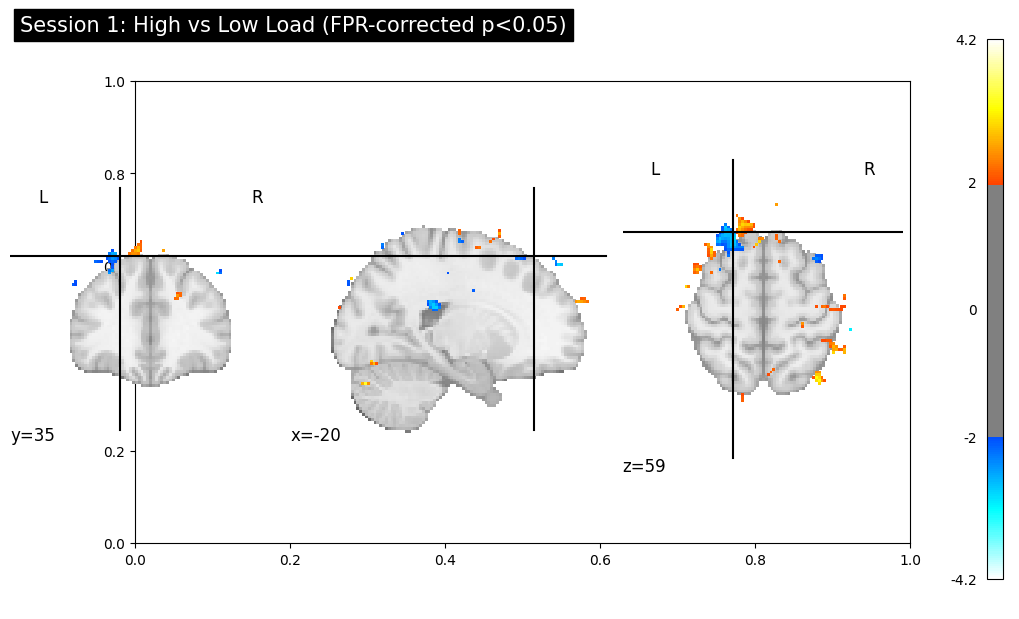

In [31]:
# plot the thresholded map (fdr didn't work; i think because not enough significance)
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
display = plotting.plot_stat_map(
    thresholded_map,
    threshold=threshold,
    display_mode='ortho',
    title=f'Session {curr_session_num+1}: High vs Low Load (FPR-corrected p<0.05)',
    figure=fig
)
plt.show()

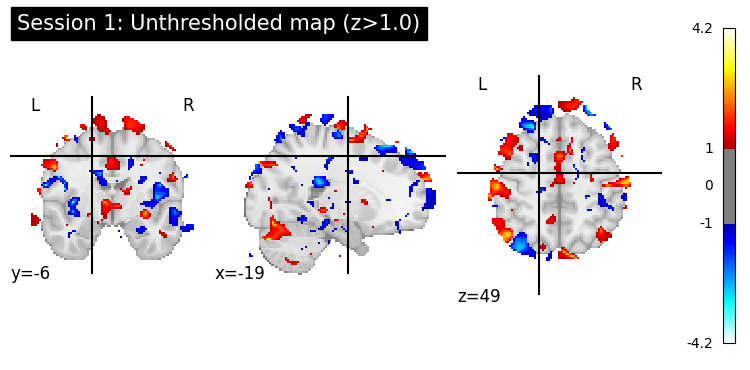

In [32]:
# plot the unthresholded map:
plotting.plot_stat_map(
    s1_z_map,
    threshold=1.0,  # Very liberal threshold
    title=f'Session {curr_session_num+1}: Unthresholded map (z>1.0)'
)

Session 2:

In [33]:
curr_session_num = 1

# get the design matrix for given session
s2_design_matrix = pd.DataFrame(session_design_rows[curr_session_num])
# Add intercept column (group effect)
s2_design_matrix['intercept'] = 1

# # load the contrast maps
s2_contrast_maps = [nib.load(cm) for cm in session_contrast_maps[curr_session_num]]

# Create and fit second-level model for this session
s2_second_level_model = SecondLevelModel(smoothing_fwhm=8.0)
s2_second_level_model.fit(s2_contrast_maps, design_matrix=s2_design_matrix)

# Compute the group effect contrast
s2_z_map = s2_second_level_model.compute_contrast(
    second_level_contrast='intercept',
    output_type='z_score'
)

# Threshold the statistical map
s2_thresholded_map, s2_threshold = threshold_stats_img(
    s2_z_map, alpha=0.05, height_control='fpr'
)

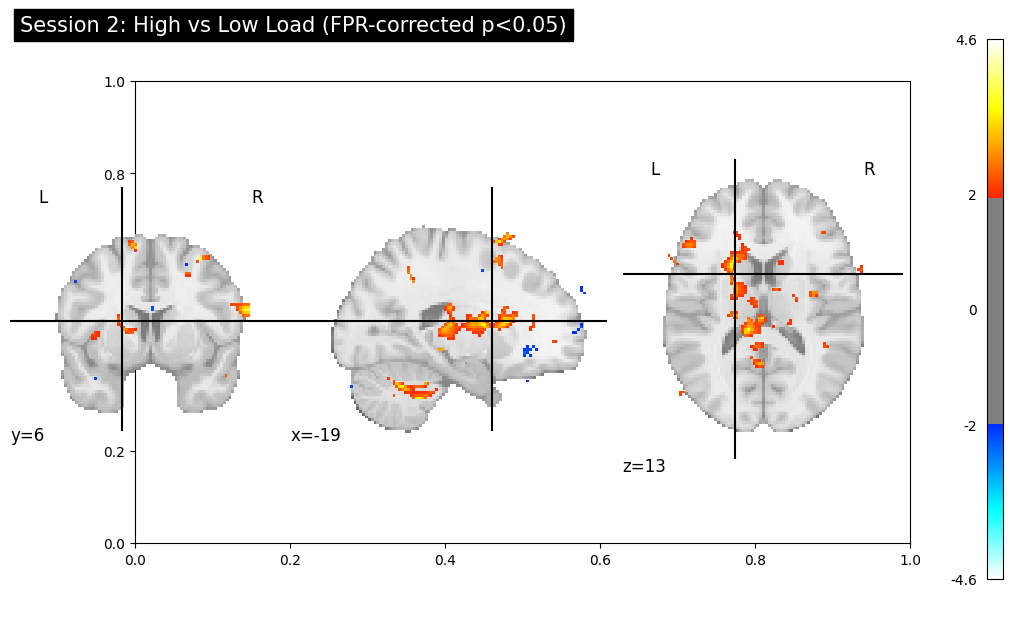

In [34]:
# plot the thresholded map (fdr didn't work; i think because not enough significance)
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
display = plotting.plot_stat_map(
    s2_thresholded_map,
    threshold=s2_threshold,
    display_mode='ortho',
    title=f'Session {curr_session_num+1}: High vs Low Load (FPR-corrected p<0.05)',
    figure=fig
)
plt.show()

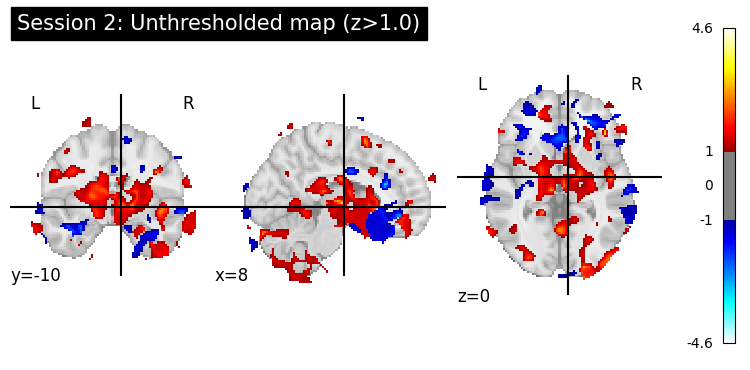

In [35]:
# plot the unthresholded map:
plotting.plot_stat_map(
    s2_z_map,
    threshold=1.0,  # Very liberal threshold
    title=f'Session {curr_session_num+1}: Unthresholded map (z>1.0)'
)

Session 3

In [36]:
curr_session_num = 2

# get the design matrix for given session
s3_design_matrix = pd.DataFrame(session_design_rows[curr_session_num])
# Add intercept column (group effect)
s3_design_matrix['intercept'] = 1

# # load the contrast maps
s3_contrast_maps = [nib.load(cm) for cm in session_contrast_maps[curr_session_num]]

# Create and fit second-level model for this session
s3_second_level_model = SecondLevelModel(smoothing_fwhm=8.0)
s3_second_level_model.fit(s3_contrast_maps, design_matrix=s3_design_matrix)

# Compute the group effect contrast
s3_z_map = s3_second_level_model.compute_contrast(
    second_level_contrast='intercept',
    output_type='z_score'
)

# Threshold the statistical map
s3_thresholded_map, s3_threshold = threshold_stats_img(
    s3_z_map, alpha=0.05, height_control='fpr'
)

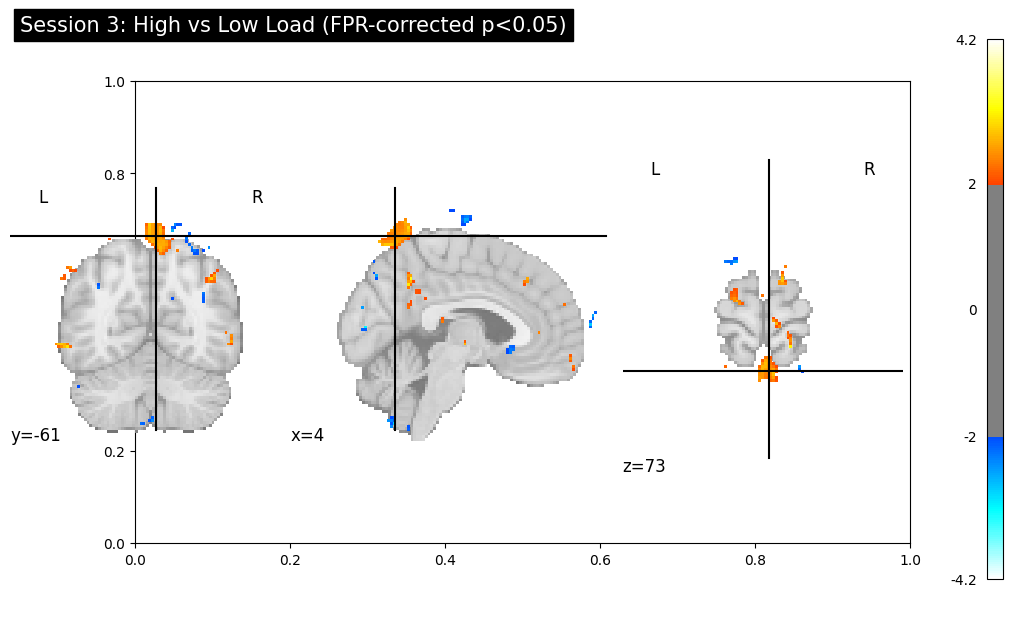

In [37]:
# plot the thresholded map (fdr didn't work; i think because not enough significance)
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
display = plotting.plot_stat_map(
    s3_thresholded_map,
    threshold=s3_threshold,
    display_mode='ortho',
    title=f'Session {curr_session_num+1}: High vs Low Load (FPR-corrected p<0.05)',
    figure=fig
)
plt.show()

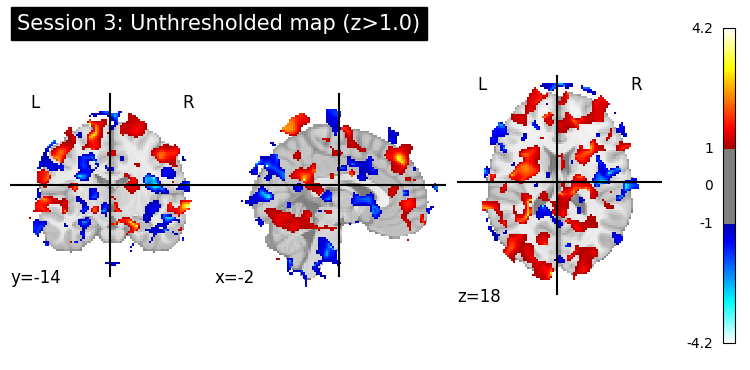

In [38]:
# plot the unthresholded map:
plotting.plot_stat_map(
    s3_z_map,
    threshold=1.0,  # Very liberal threshold
    title=f'Session {curr_session_num+1}: Unthresholded map (z>1.0)'
)

Session 4

In [39]:
curr_session_num = 3

# get the design matrix for given session
s4_design_matrix = pd.DataFrame(session_design_rows[curr_session_num])
# Add intercept column (group effect)
s4_design_matrix['intercept'] = 1

# # load the contrast maps
s4_contrast_maps = [nib.load(cm) for cm in session_contrast_maps[curr_session_num]]

# Create and fit second-level model for this session
s4_second_level_model = SecondLevelModel(smoothing_fwhm=8.0)
s4_second_level_model.fit(s4_contrast_maps, design_matrix=s4_design_matrix)

# Compute the group effect contrast
s4_z_map = s4_second_level_model.compute_contrast(
    second_level_contrast='intercept',
    output_type='z_score'
)

# Threshold the statistical map
s4_thresholded_map, s4_threshold = threshold_stats_img(
    s4_z_map, alpha=0.05, height_control='fpr'
)

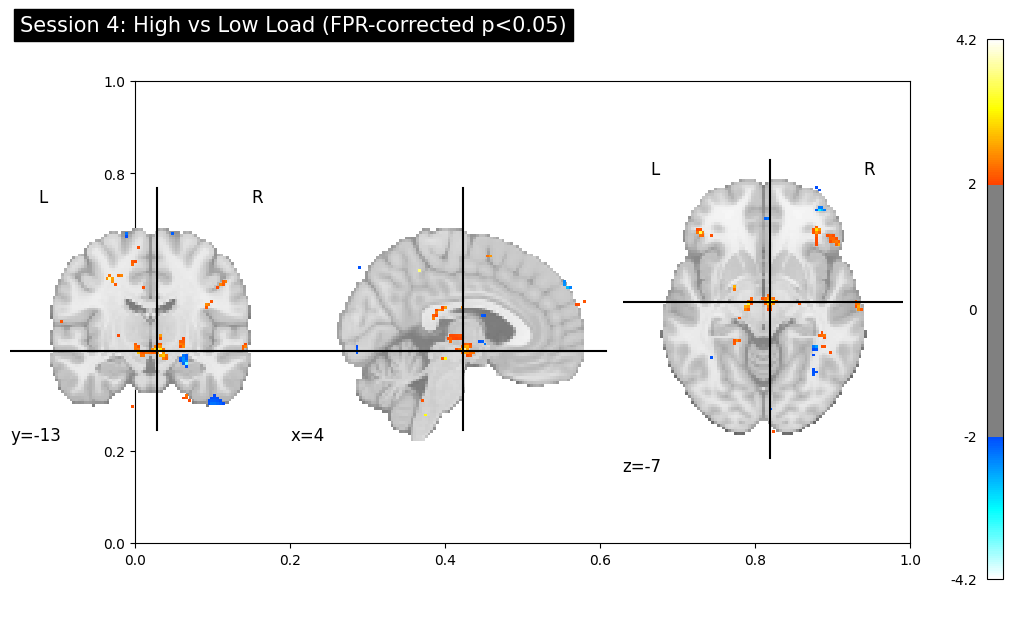

In [40]:
# plot the thresholded map (fdr didn't work; i think because not enough significance)
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
display = plotting.plot_stat_map(
    s4_thresholded_map,
    threshold=s4_threshold,
    display_mode='ortho',
    title=f'Session {curr_session_num+1}: High vs Low Load (FPR-corrected p<0.05)',
    figure=fig
)
plt.show()

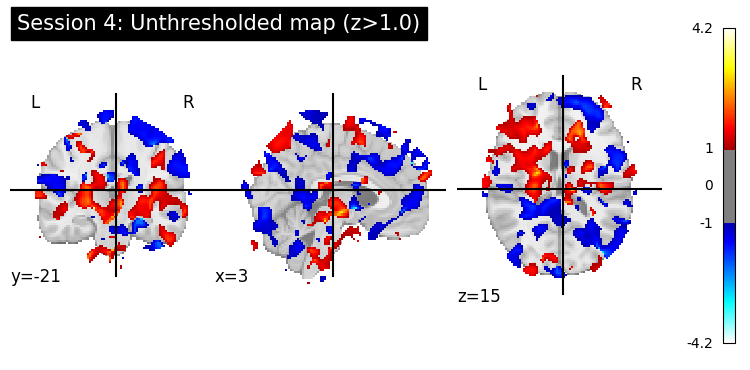

In [41]:
# plot the unthresholded map:
plotting.plot_stat_map(
    s4_z_map,
    threshold=1.0,  # Very liberal threshold
    title=f'Session {curr_session_num+1}: Unthresholded map (z>1.0)'
)

Session 5

In [42]:
curr_session_num = 4

# get the design matrix for given session
s5_design_matrix = pd.DataFrame(session_design_rows[curr_session_num])
# Add intercept column (group effect)
s5_design_matrix['intercept'] = 1

# # load the contrast maps
s5_contrast_maps = [nib.load(cm) for cm in session_contrast_maps[curr_session_num]]

# Create and fit second-level model for this session
s5_second_level_model = SecondLevelModel(smoothing_fwhm=8.0)
s5_second_level_model.fit(s5_contrast_maps, design_matrix=s5_design_matrix)

# Compute the group effect contrast
s5_z_map = s5_second_level_model.compute_contrast(
    second_level_contrast='intercept',
    output_type='z_score'
)

# Threshold the statistical map
s5_thresholded_map, s5_threshold = threshold_stats_img(
    s5_z_map, alpha=0.05, height_control='fpr'
)

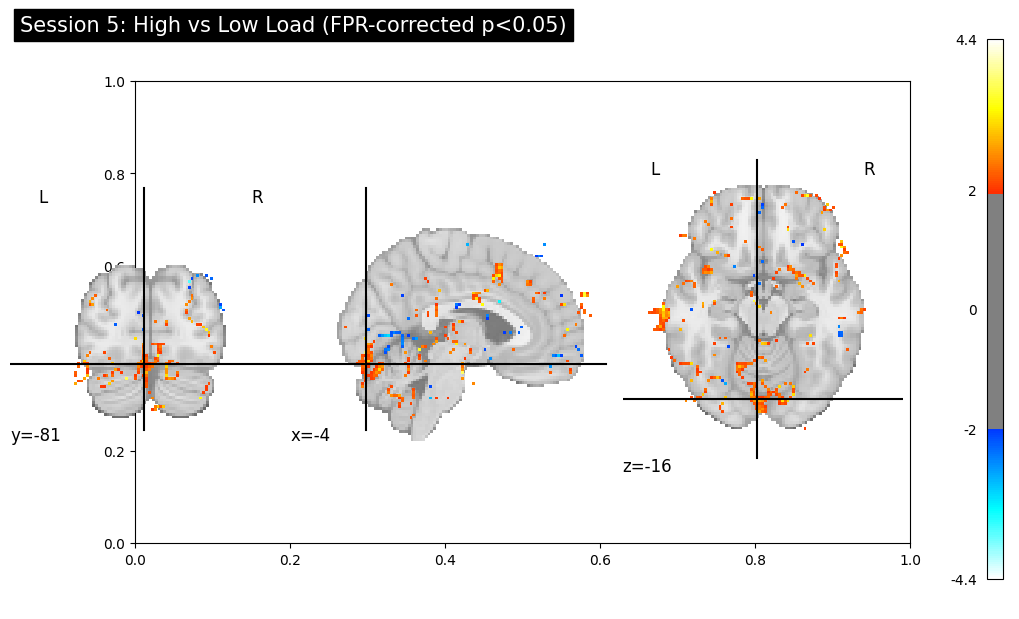

In [43]:
# plot the thresholded map (fdr didn't work; i think because not enough significance)
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
display = plotting.plot_stat_map(
    s5_thresholded_map,
    threshold=s5_threshold,
    display_mode='ortho',
    title=f'Session {curr_session_num+1}: High vs Low Load (FPR-corrected p<0.05)',
    figure=fig
)
plt.show()

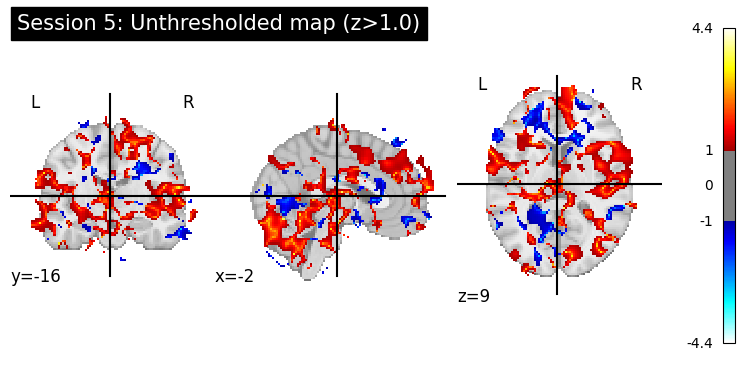

In [44]:
# plot the unthresholded map:
plotting.plot_stat_map(
    s5_z_map,
    threshold=1.0,  # Very liberal threshold
    title=f'Session {curr_session_num+1}: Unthresholded map (z>1.0)'
)